In [ ]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Load dataset
dataset = pd.read_csv('/content/titanic.csv')
print("Dataset:")
print(dataset.head())

Dataset:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [ ]:
data = dataset[['Age', 'Fare', 'Survived']].dropna()

x = data[['Age', 'Fare']].values
y = data['Survived'].values

In [ ]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
# Standarisasi fitur
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Training KNN model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_prediksi = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
hasil_cm = confusion_matrix(y_test, y_prediksi)
print (hasil_cm)

[[30 18]
 [18 17]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_prediksi))
print ("tingkat akurasi : ", accuracy_score(y_test, y_prediksi)*100, "%")

0.5662650602409639
tingkat akurasi :  56.62650602409639 %


<ipython-input-40-486e1fe7c05c>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data[y_data == j, 0], x_data[y_data == j, 1],


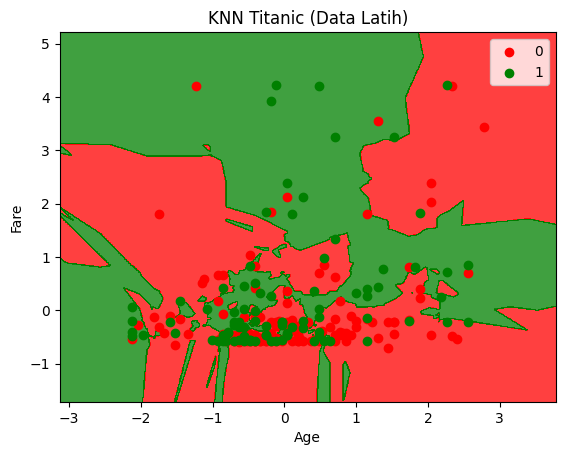

In [ ]:
# Visualisasi (data latih)
x_data, y_data = x_train, y_train
x1, x2 = np.meshgrid(
    np.arange(start=x_data[:, 0].min() - 1, stop=x_data[:, 0].max() + 1, step=0.01),
    np.arange(start=x_data[:, 1].min() - 1, stop=x_data[:, 1].max() + 1, step=0.01)
)
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(x_data[y_data == j, 0], x_data[y_data == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('KNN Titanic (Data Latih)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

<ipython-input-41-1e05f46d8dad>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],


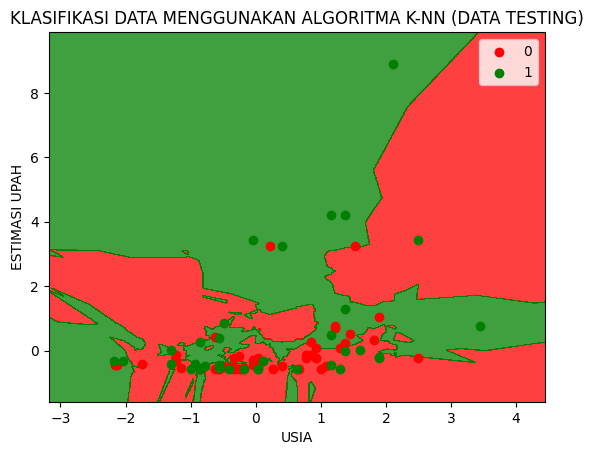

In [ ]:
# Visualisasi data testing
from matplotlib.colors import ListedColormap
x_data, y_data = x_test, y_test
x_one, x_two = np.meshgrid (np.arange(start = x_data[:, 0].min() - 1, stop = x_data[:, 0].max() + 1, step = 0.01),
                            np.arange(start = x_data[:, 1].min() - 1, stop = x_data[:, 1].max() + 1, step = 0.01))
plt.contourf(x_one, x_two, classifier.predict(np.array([x_one.ravel(), x_two.ravel()]).T).reshape(x_one.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())
for g, h in enumerate (np.unique(y_test)):
    plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],
                c = ListedColormap(('red', 'green'))(g), label = h)
plt.title('KLASIFIKASI DATA MENGGUNAKAN ALGORITMA K-NN (DATA TESTING)')
plt.xlabel('USIA')
plt.ylabel('ESTIMASI UPAH')
plt.legend()
plt.show()